In [12]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

### Read and show the image

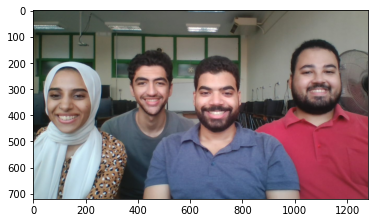

In [13]:
# read the image
img = cv2.imread('./Examples/Our_Faces.jpg')

RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)
plt.show()

In [14]:
def DetectSkinColor(img):
    """Detect skin color in an image

    Args:
        img (_type_): image

    Returns:
        _type_: a boolean mask of the image skin
    """
    # extract red and green and blue channels
    b, g, r = cv2.split(img)

    # do a piecewise log
    calc1 = cv2.log(r/g)
    calc2 = cv2.log(b/g)

    # mask if test1 between [0.15;1.1] and test2 between [-4;0.3]
    mask = (calc1 > 0.15) & (calc1 < 1.1) & (calc2 > -4) & (calc2 < 0.3)
    
    return mask

In [4]:
def DetectSkinColorYCBCR(img):
    imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    # extract y, cr , cb channels
    y, cr, cb = cv2.split(imgYCC)
    #  mask if cb between [77;126] and cr between [133;172]
    mask = (cb > 77) & (cb < 126) & (cr > 133) & (cr < 172)
    return mask
DetectSkinColorYCBCR(img)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


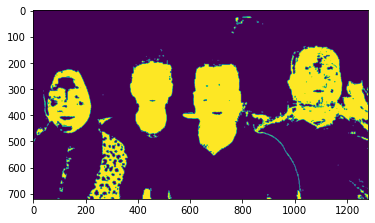

In [19]:
skinMask = DetectSkinColor(img)
# skinMask = DetectSkinColorYCBCR(img)

# change false to 0 and true to 255
skinMask = skinMask.astype(np.uint8)
skinMask = skinMask * 255

print(skinMask)

# Save the mask
cv2.imwrite('./Our_Faces_Skin_Mask.jpg', skinMask)

plt.imshow(skinMask)
plt.show()

In [6]:
def EdgeDetection(img, sigma=0.33):
    """Returns the edges in the image

    Args:
        img (_type_): image to extract features from
        sigma (float, optional): threshold of ranges of values to consider as edges. Defaults to 0.33.

    Returns:
        _type_: Edges in the image
    """
    # Detect edges in the image
    median = np.median(img)
    lower = int(max(0, (1.0 - sigma) * median))
    upper = int(min(255, (1.0 + sigma) * median))
    edges = cv2.Canny(img, lower, upper) # 50,100 also works well
    return edges

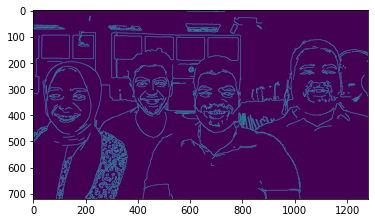

In [20]:
edges = EdgeDetection(img)

# save the edges
cv2.imwrite('./Our_Faces_Edges.jpg', edges)

plt.imshow(edges)
plt.show()

In [8]:
print(edges)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print(skinMask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


In [10]:
# convert 0 to true and 1 to false of edges
edges = np.where(edges == 0, False, True)
print(edges)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


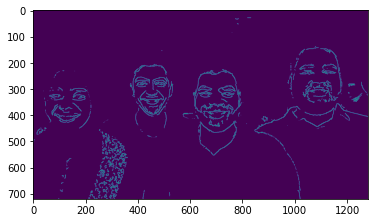

In [24]:
# and edges with skin mask
andedMask = np.logical_and(edges, skinMask)

andedMask = andedMask.astype(np.uint8)
andedMask = andedMask * 255

# save the anded mask
cv2.imwrite('./Our_Faces_Edges_And_Skin_Mask.jpg', andedMask)

plt.imshow(andedMask)
plt.show()